# Tejas Dadhaniya

# Task
>Predict the percentage of an student based on the no. of study hours.

>Dataset : 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [34]:
# Import necessary library.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Data preparation

In [35]:
# Get the data.
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [36]:
# Fetch frist five records.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [37]:
# Check weather null value present or not.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

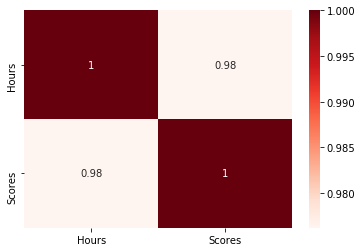

In [38]:
# correlation between feature.
import seaborn as sns
sns.heatmap(data=df.corr(),annot=True,cmap='Reds')
plt.show()

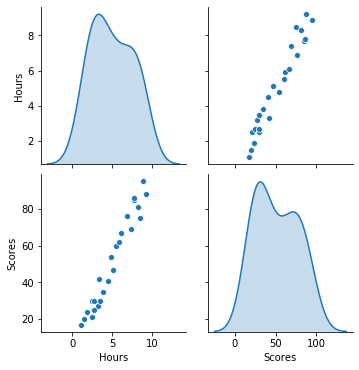

In [39]:
# Understand distribution of features.
sns.pairplot(data=df,diag_kind='kde')
plt.show()

> Above graph clearly shown that student's precentage linerly depends on study hours.  

> Hours and scores are nearly normally distributed.

In [40]:
# Separate depenadent and independent feature.
x = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [41]:
# Split dataset into training set and testing set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

### Model training

In [42]:
# Train model. 
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [43]:
# Creat regression line using model parameters.
regression_line = reg.coef_*x + reg.intercept_

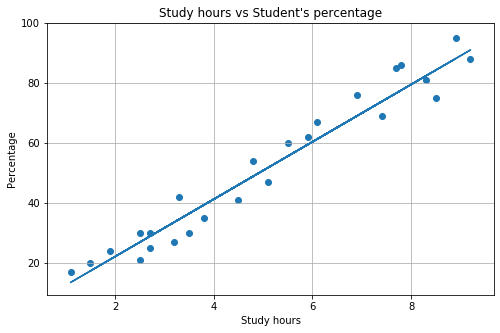

In [44]:
# Visualize your result.
plt.figure(figsize=(8,5))
plt.plot(x,regression_line)
plt.scatter(df.Hours, df.Scores)
plt.title("Study hours vs Student's percentage")
plt.xlabel('Study hours')
plt.ylabel('Percentage')
plt.grid()

### Prediction

In [45]:
# Do a prediction on test dataset.
y_pred = reg.predict(x_test)
pd.DataFrame({'Actual_score': y_test, 'Predicted_score': y_pred})  

,Actual_score,Predicted_score
0,30,28.918981
1,76,69.082307
2,60,55.694532
3,67,61.432150
4,62,59.519611
5,41,46.131835
6,25,28.918981


In [46]:
# Coustom prediction.
# What will be predicted score if a student studies for 9.25 hrs/ day?
hrs = 9.25
prediction = reg.predict([[hrs]])
print('If student study for {} hrs/day, then student will more likely to score around {} %.'.format(hrs, prediction[0]))

If student study for 9.25 hrs/day, then student will more likely to score around 91.55464456367523 %.


### Model evalution

In [47]:
# Evaluate your model using metrices.
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('r2_score: {}\nmean absolute error: {}\nmean squared error: {}'.format(r2,mae,mse))

r2_score: 0.9362812154892889
mean absolute error: 4.200462219820001
mean squared error: 20.915365919801577
